# Part 1- Data Selection and Preprocessing

In [53]:
import numpy as np
import pandas as pd
import gzip
import json

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Luxury_Beauty_5.json.gz')

In [54]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN


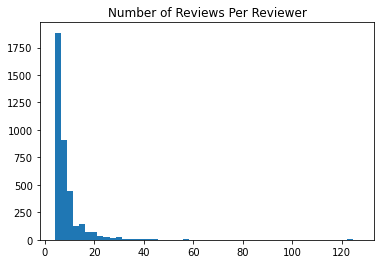

In [55]:
import matplotlib.pyplot as plt
df['ting'] = 1
plt.hist(df.groupby('reviewerID')['ting'].count(), bins =50)
plt.title('Number of Reviews Per Reviewer')
plt.show()

In [62]:
df.shape

(34278, 13)

In [61]:
len(df['reviewerID'].unique())

3819

In [63]:
len(df['asin'].unique())

1581

In [60]:
df.groupby('reviewerID')['ting'].count()

127

In [4]:
# make train/test set
train_inds = []
for user in df['reviewerID'].unique():
    inds = df[df['reviewerID'] == user].index.values
    t_inds = inds[np.random.choice(len(inds), size = int(len(inds)*0.8), replace=False)]
    for val in t_inds:
        train_inds.append(val)
test_inds = list(set(df.index.values)-set(train_inds))

In [5]:
assert len(train_inds) == len(set(train_inds)), "Repeat values found in train indices"
assert len(test_inds) == len(list(set(test_inds))), "Repeat values found in test indices"
       

In [6]:
train_df = df.iloc[train_inds]
test_df = df.iloc[test_inds]

train_df.shape

(26087, 13)

In [64]:
train_df.shape[0]/df.shape[0]

0.761042067798588

In [7]:
train_df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ting
23715,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00FASVFI8,"{'Size:': ' 0.9 oz', 'Scent:': ' Gardeners'}",DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN,1
4542,3.0,True,"08 14, 2016",A2HOI48JK8838M,B000Q39MBY,NaN,DB,I truthfully could not differentiate the resul...,Paying for the name.,1471132800,NaN,NaN,1
3710,5.0,True,"08 14, 2016",A2HOI48JK8838M,B000NGI4QI,{'Scent:': ' Original'},DB,This is the best I've used and the one I reorder.,Best in show.,1471132800,NaN,NaN,1
25734,5.0,True,"03 27, 2016",A2HOI48JK8838M,B00JI7AI3A,NaN,DB,This product has literally lifted the appearan...,Excellent!!!,1459036800,13,NaN,1
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN,1


In [8]:
train_df['overall'].value_counts(dropna=False)

5.0    15190
4.0     6007
3.0     2954
2.0     1111
1.0      825
Name: overall, dtype: int64

# Pt. 2-- Rating Prediction

In [76]:
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_df[['reviewerID', 'asin', 'overall']], reader)
test_data = Dataset.load_from_df(test_df[['reviewerID', 'asin', 'overall']], reader)

### Candidate Model 1-- SVD

In [67]:
from surprise import SVD
from surprise.model_selection import cross_validate
svd = SVD(verbose=True, n_epochs=50)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

{'test_rmse': array([0.8480813 , 0.83410805, 0.8317435 ]),
 'test_mae': array([0.58394286, 0.57660837, 0.57253112]),
 'fit_time': (2.544389247894287, 2.7001097202301025, 2.7070231437683105),
 'test_time': (0.07257080078125, 0.16733431816101074, 0.06374883651733398)}

In [81]:
num_right = 0
mae = 0
rmse = 0
for i in range(test_df.shape[0]):
    uid = test_df['reviewerID'].iloc[i]
    iid = test_df['asin'].iloc[i]
    pred = svd.predict(uid=uid, iid=iid)[3]
    mae += np.abs(pred - test_df['overall'].iloc[i])
    rmse += (pred - test_df['overall'].iloc[i])**2
    prediction = round(pred)
    if prediction == test_df['overall'].iloc[i]:
        num_right+=1
mae = mae / test_df.shape[0]
rmse = np.sqrt(rmse/test_df.shape[0])
print('MAE: {}'.format(mae))
print('RMSE: {}'.format(rmse))
print('Accuracy: {:.2f}%'.format(num_right*100/test_df.shape[0]))

MAE: 0.5713599844083651
RMSE: 0.8356639632017644
Accuracy: 58.16%


### Candidate Model 2-- SVD PP

In [12]:
from surprise.prediction_algorithms.matrix_factorization import SVDpp
svd_pp = SVDpp(verbose=True, n_epochs=50)
cross_validate(svd_pp, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
 processing epoch 20
 processing epoch 21
 processing epoch 22
 processing epoch 23
 processing epoch 24
 processing epoch 25
 processing epoch 26
 processing epoch 27
 processing epoch 28
 processing epoch 29
 processing epoch 30
 processing epoch 31
 processing epoch 32
 processing epoch 33
 processing epoch 34
 processing epoch 35
 processing epoch 36
 processing epoch 37
 processing epoch 38
 processing epoch 39
 processing epoch 40
 processing epoch 41
 processing epoch 42
 processing epoch 43
 processing epoch 44
 processing epoch 45
 processing epoch 46
 processing epoch 47
 p

{'test_rmse': array([0.83961121, 0.84473781, 0.85178207]),
 'test_mae': array([0.56785261, 0.57224136, 0.57310509]),
 'fit_time': (10.613032102584839, 10.637283086776733, 10.416038751602173),
 'test_time': (0.27745819091796875, 0.25756120681762695, 0.21722006797790527)}

In [82]:
num_right = 0
mae = 0
rmse = 0
for i in range(test_df.shape[0]):
    uid = test_df['reviewerID'].iloc[i]
    iid = test_df['asin'].iloc[i]
    pred = svd_pp.predict(uid=uid, iid=iid)[3]
    mae += np.abs(pred - test_df['overall'].iloc[i])
    rmse += (pred - test_df['overall'].iloc[i])**2
    prediction = round(pred)
    if prediction == test_df['overall'].iloc[i]:
        num_right+=1
mae = mae / test_df.shape[0]
rmse = np.sqrt(rmse/test_df.shape[0])
print('MAE: {}'.format(mae))
print('RMSE: {}'.format(rmse))
print('Accuracy: {:.2f}%'.format(num_right*100/test_df.shape[0]))

MAE: 0.5622140504779678
RMSE: 0.8428349029401858
Accuracy: 59.00%


### Candidate Model 3-- I-I KNN

In [87]:
from surprise.prediction_algorithms.knns import KNNWithMeans
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between users if true, items otherwise
               }
knn_i = KNNWithMeans(k=10, sim_options=sim_options)
cross_validate(knn_i, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9129  0.9119  0.9245  0.9164  0.0057  
MAE (testset)     0.5684  0.5699  0.5806  0.5730  0.0055  
Fit time          0.18    0.18    0.14    0.17    0.02    
Test time         0.15    0.16    0.17    0.16    0.01    


{'test_rmse': array([0.91285716, 0.91187259, 0.92453146]),
 'test_mae': array([0.56840712, 0.5698771 , 0.58064792]),
 'fit_time': (0.17787790298461914, 0.18248796463012695, 0.14341139793395996),
 'test_time': (0.14893507957458496, 0.15900397300720215, 0.16572976112365723)}

In [88]:
num_right = 0
mae = 0
rmse = 0
for i in range(test_df.shape[0]):
    uid = test_df['reviewerID'].iloc[i]
    iid = test_df['asin'].iloc[i]
    pred = knn_i.predict(uid=uid, iid=iid)[3]
    mae += np.abs(pred - test_df['overall'].iloc[i])
    rmse += (pred - test_df['overall'].iloc[i])**2
    prediction = round(pred)
    if prediction == test_df['overall'].iloc[i]:
        num_right+=1
mae = mae / test_df.shape[0]
rmse = np.sqrt(rmse/test_df.shape[0])
print('MAE: {}'.format(mae))
print('RMSE: {}'.format(rmse))
print('Accuracy: {:.2f}%'.format(num_right*100/test_df.shape[0]))

MAE: 0.5602749277920428
RMSE: 0.9114925396976201
Accuracy: 59.09%


### Candidate Model 4-- Slope 1

In [16]:
from surprise.prediction_algorithms.slope_one import SlopeOne
s1 = SlopeOne()
cross_validate(s1, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9750  0.9459  0.9551  0.9587  0.0122  
MAE (testset)     0.5853  0.5700  0.5753  0.5769  0.0064  
Fit time          0.11    0.11    0.10    0.11    0.01    
Test time         0.11    0.17    0.11    0.13    0.03    


{'test_rmse': array([0.97500973, 0.94586493, 0.95512245]),
 'test_mae': array([0.5853143 , 0.569952  , 0.57534753]),
 'fit_time': (0.11356997489929199, 0.11235189437866211, 0.10137772560119629),
 'test_time': (0.11046886444091797, 0.17234015464782715, 0.10668325424194336)}

In [84]:
num_right = 0
mae = 0
rmse = 0
for i in range(test_df.shape[0]):
    uid = test_df['reviewerID'].iloc[i]
    iid = test_df['asin'].iloc[i]
    pred = s1.predict(uid=uid, iid=iid)[3]
    mae += np.abs(pred - test_df['overall'].iloc[i])
    rmse += (pred - test_df['overall'].iloc[i])**2
    prediction = round(pred)
    if prediction == test_df['overall'].iloc[i]:
        num_right+=1
mae = mae / test_df.shape[0]
rmse = np.sqrt(rmse/test_df.shape[0])
print('MAE: {}'.format(mae))
print('RMSE: {}'.format(rmse))
print('Accuracy: {:.2f}%'.format(num_right*100/test_df.shape[0]))

MAE: 0.577940963413549
RMSE: 0.9502725586545544
Accuracy: 58.99%


### Candidate Model 4-- U-U KNN

In [22]:
from surprise.prediction_algorithms.knns import KNNWithMeans
sim_options = {'name': 'pearson_baseline',
               'user_based': True  # compute  similarities between users if true, items otherwise
               }
knn = KNNWithMeans(k=10, sim_options=sim_options)
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9140  0.8950  0.9014  0.9035  0.0079  
MAE (testset)     0.5460  0.5403  0.5334  0.5399  0.0052  
Fit time          0.81    0.62    0.67    0.70    0.08    
Test time         0.55    0.55    0.58    0.56    0.02    


{'test_rmse': array([0.91397323, 0.89499891, 0.90143415]),
 'test_mae': array([0.54600429, 0.54031991, 0.53339972]),
 'fit_time': (0.8091182708740234, 0.624312162399292, 0.6680138111114502),
 'test_time': (0.5486268997192383, 0.5487968921661377, 0.5809550285339355)}

In [85]:
num_right = 0
mae = 0
rmse = 0
for i in range(test_df.shape[0]):
    uid = test_df['reviewerID'].iloc[i]
    iid = test_df['asin'].iloc[i]
    pred = knn.predict(uid=uid, iid=iid)[3]
    mae += np.abs(pred - test_df['overall'].iloc[i])
    rmse += (pred - test_df['overall'].iloc[i])**2
    prediction = round(pred)
    if prediction == test_df['overall'].iloc[i]:
        num_right+=1
mae = mae / test_df.shape[0]
rmse = np.sqrt(rmse/test_df.shape[0])
print('MAE: {}'.format(mae))
print('RMSE: {}'.format(rmse))
print('Accuracy: {:.2f}%'.format(num_right*100/test_df.shape[0]))

MAE: 0.529742499606027
RMSE: 0.8923274652110129
Accuracy: 61.49%


# Part 3-- Recommendations (SVD_PP, Slope 1, KNN)

### SVP_PP

In [38]:
unique_items = set(train_df['asin'].unique())
user_predictions = {}
for i in range(test_df.shape[0]):
    uid = test_df['reviewerID'].iloc[i]
    train_set_viewed = train_df.set_index('reviewerID').loc[uid]['asin'].values
    items_to_predict = list(unique_items-set(train_set_viewed))
    prediction_rank = {}
    for item in items_to_predict:
        prediction_rank[item] =  svd_pp.predict(uid=uid, iid=item)[3]
    sorted_predictions = {k: v for k, v in sorted(prediction_rank.items(), key=lambda item: item[1], reverse=True)}
    top_predicted_items = list(sorted_predictions.keys())[:10]
    user_predictions[uid] = top_predicted_items

In [39]:
df=pd.DataFrame.from_dict(user_predictions,orient='columns')
df

,A1YIPEY7HX73S7,AX5ZDQUSZG8MI,A2R4UNHFJBA6PY,A3HG0DNFURFXR4,AK3402G7FO7AY,A1606LA683WZZU,A3TCMJ6GKZJFBQ,A3R0NQ9E53JHYQ,A1WKQ94M45D8MG,A2QCGHIJ2TCLVP,...,A1PRZ3GE0C2ANS,A3U0S17XYK8XMJ,APL83S3QHRHGT,A2R44UZ6Z9UOZP,A3LOAIRUUNO5IX,A1CWXKAC4W0GIU,AJXZUXN05JWXV,A17PDSMPB7HLYZ,A3IMK08UX0I46A,A3E5D0Z4L63AD8
0,B004N2SQUC,B004N2SQUC,B004N2SQUC,B019N8UNK6,B00172O9NO,B004N2SQUC,B00O0GBRL6,B000Z603EM,B005CBWYME,B00IK1CJZU,...,B00N0YMMMC,B0166EMYQG,B00014GT8W,B007NPX4LM,B004N2SQUC,B004N2SQUC,B0011FMDU8,B000Z603EM,B007NPX4LM,B002RS6JSA
1,B007NPX4LM,B00N0YMMMC,B007NPX4LM,B000IOBEG2,B00O0GBRL6,B00175YVNO,B00AN4GZ52,B000068DWY,B0015Z532O,B00II17BAA,...,B007NPX4LM,B00CUF29WU,B0002ZW5UQ,B0015Z532O,B007NPX4LM,B007NPX4LM,B00O0GBRL6,B004N2SQUC,B005CBWYME,B004SUY40A
2,B00IK1CJZU,B00IK1CJZU,B00120RRYO,B004N2S2JM,B00QTTJWMS,B019N8UNK6,B0059JS1BW,B004N2SQUC,B0002MPS7G,B0015VN6V8,...,B005CBWYME,B000PHVTVC,B000CNTT9I,B000GSTHZU,B00175YVNO,B00175YVNO,B000IOBEG2,B007NPX4LM,B0015Z532O,B000Z603EM
3,B019N8UNK6,B019N8UNK6,B000Q2Y062,B00O0GBRL6,B000W8JZII,B0015Z532O,B000PZA2KS,B000OSADQE,B00NZ1FH86,B000IOBEG2,...,B010NL8Q92,B0002CEIQ8,B0019H7Z38,B00NZ1FH86,B005CBWYME,B005CBWYME,B002D4J3VI,B011JFR26Y,B00II17BAA,B004N2SQUC
4,B0015Z532O,B0015Z532O,B00175YVNO,B00172BJ7I,B01443UL3Y,B0013B53DY,B001377JEY,B00120RRYO,B00II17BAA,B0018APVTG,...,B019N8UNK6,B00O0GBRL6,B004SY3X3A,B00II17BAA,B0015Z532O,B0015Z532O,B00B4F0LZ4,B00175YVNO,B00B4F0LZ4,B01A61XUU4
5,B000GSTHZU,B00MRFP8I0,B00IK1CJZU,B0013A6NFM,B014UC1QE2,B00172O9NO,B00R69ZDW8,B0001435D4,B00B4F0LZ4,B0015ZC1AQ,...,B0015Z532O,B00AGR7KHS,B01C8278QQ,B00B4F0LZ4,B000GSTHZU,B00II17BAA,B00FASVFI8,B00IK1CJZU,B0015VN6V8,B00N0YMMMC
6,B00NZ1FH86,B000GSTHZU,B01C8278QQ,B000VOHQW0,B000MEKG30,B00NZ1FH86,B00176B9JC,B00175YVNO,B00IRNQJYI,B007PCB5OQ,...,B0002MPS7G,B001G60EK8,B0010OKF7S,B00IRNQJYI,B00II17BAA,B00B4F0LZ4,B000VOHQW0,B005CBWYME,B00IRNQJYI,B000WXGU4A
7,B00II17BAA,B0013B53DY,B00B4LKGIK,B00176B9JC,B002D48QUC,B00II17BAA,B000IIA5UO,B00IK1CJZU,B001GAOUZY,B002D4J3VI,...,B000GSTHZU,B0002RI2PG,B004TMRW24,B001GAOUZY,B00B4F0LZ4,B0015VN6V8,B0015Z532O,B019N8UNK6,B00R69ZDW8,B00ES5KT54
8,B00B4F0LZ4,B00172O9NO,B005CBWYME,B0002ZW5UQ,B001AO0WCG,B00B4F0LZ4,B0010P6D28,B01C8278QQ,B00R69ZDW8,B000V87E7S,...,B01ALDX6FQ,B01ALDX6FQ,B002QG6P9G,B000IOBEG2,B00R69ZDW8,B001GAOUZY,B000Q336XY,B0015Z532O,B004ILMUYG,B007NPX4LM
9,B001GAOUZY,B00NZ1FH86,B00HSR0Q3Y,B000TD2QXC,B004YVDM2Y,B001GAOUZY,B00ZY65RUI,B005CBWYME,B004ILMUYG,B00O0GBRL6,...,B00II17BAA,B004KIB688,B007PORYUI,B0013A6NFM,B004ILMUYG,B00R69ZDW8,B014UC1QE2,B00172BJ3W,B0025YVBG6,B000PEJO76


In [40]:
df.to_csv('user_predictions_svd_pp.csv')

In [41]:
df = pd.read_csv('user_predictions_svd_pp.csv').drop('Unnamed: 0', axis=1)

In [42]:
tp = 0
fp = 0
fn = 0
conversions = 0
recalls = []
count = 0
for uid in df.columns: 
    test_set_viewed = test_df.set_index('reviewerID').loc[uid]
    if len(test_set_viewed.shape) == 1:
        test_set_viewed = [test_set_viewed['asin']]
    else:
        test_set_viewed = list(test_df.set_index('reviewerID').loc[uid]['asin'])
    recs = df[uid]
    converted = False
    for i, item in enumerate(list(recs)):
        if item in test_set_viewed:
            converted = True
            tp += 1
        else:
            fp += 1
    if converted:
        conversions += 1
    for item in test_set_viewed:
        if item not in recs:
            fn += 1
P = tp/(tp+fp)
R = tp/(tp+fn)
CR = conversions/df.shape[1]
print('F-score: {}'.format(2*P*R/(P+R)))
print('Precision: {}'.format(P))
print('Recall: {}'.format(R))
print('Conversion Rate: {}'.format(CR))


F-score: 0.00241186984516657
Precision: 0.0014663524482848914
Recall: 0.006790348005335274
Conversion Rate: 0.014401675831369469


### Slope 1

In [43]:
unique_items = set(train_df['asin'].unique())
user_predictions_s1 = {}
for i in range(test_df.shape[0]):
    uid = test_df['reviewerID'].iloc[i]
    train_set_viewed = train_df.set_index('reviewerID').loc[uid]['asin'].values
    items_to_predict = list(unique_items-set(train_set_viewed))
    prediction_rank = {}
    for item in items_to_predict:
        prediction_rank[item] =  s1.predict(uid=uid, iid=item)[3]
    sorted_predictions = {k: v for k, v in sorted(prediction_rank.items(), key=lambda item: item[1], reverse=True)}
    top_predicted_items = list(sorted_predictions.keys())[:10]
    user_predictions_s1[uid] = top_predicted_items


In [44]:
df=pd.DataFrame.from_dict(user_predictions_s1,orient='columns')
df

,A1YIPEY7HX73S7,AX5ZDQUSZG8MI,A2R4UNHFJBA6PY,A3HG0DNFURFXR4,AK3402G7FO7AY,A1606LA683WZZU,A3TCMJ6GKZJFBQ,A3R0NQ9E53JHYQ,A1WKQ94M45D8MG,A2QCGHIJ2TCLVP,...,A1PRZ3GE0C2ANS,A3U0S17XYK8XMJ,APL83S3QHRHGT,A2R44UZ6Z9UOZP,A3LOAIRUUNO5IX,A1CWXKAC4W0GIU,AJXZUXN05JWXV,A17PDSMPB7HLYZ,A3IMK08UX0I46A,A3E5D0Z4L63AD8
0,B000PHZ7GK,B0019IVEEI,B000PHZ7GK,B000PHZ7GK,B0019IVEEI,B000PHZ7GK,B0019IVEEI,B000PHZ7GK,B01BQMKPNM,B000PHZ7GK,...,B000PHZ7GK,B00ES5KT54,B0013U0EYI,B000PHZ7GK,B000PHZ7GK,B000PHZ7GK,B007KE40EQ,B000PHZ7GK,B000PHZ7GK,B000PHZ7GK
1,B002RS6JSA,B01BQMKPNM,B002RS6JSA,B002RS6JSA,B00YHPQLO8,B002RS6JSA,B014CE15US,B002RS6JSA,B00AAR9I60,B002RS6JSA,...,B002RS6JSA,B00F6XZN9O,B0012V3Y54,B002RS6JSA,B002RS6JSA,B002RS6JSA,B00AAR9I60,B002RS6JSA,B002RS6JSA,B002RS6JSA
2,B015QAUJ0Y,B00ES5KT54,B015QAUJ0Y,B015QAUJ0Y,B007NPX4LM,B015QAUJ0Y,B007340K8S,B015QAUJ0Y,B000C1Z2D2,B015QAUJ0Y,...,B015QAUJ0Y,B00YOL1D66,B00172IEVM,B015QAUJ0Y,B015QAUJ0Y,B015QAUJ0Y,B00AKOU452,B015QAUJ0Y,B015QAUJ0Y,B015QAUJ0Y
3,B004SUY40A,B007NPX4LM,B004SUY40A,B004SUY40A,B00HX27AM4,B004SUY40A,B003QXZWYW,B004SUY40A,B002616M1C,B004SUY40A,...,B004SUY40A,B013WZDAFQ,B0058QM77K,B004SUY40A,B004SUY40A,B004SUY40A,B00T57UPNQ,B004SUY40A,B004SUY40A,B004SUY40A
4,B007KE40EQ,B00HX27AM4,B0013EF2DC,B007KE40EQ,B00175YVNO,B007KE40EQ,B01B4OIJ6M,B007KE40EQ,B00X7NEOVS,B007KE40EQ,...,B007KE40EQ,B00CUF29WU,B000NUG5LK,B007KE40EQ,B007KE40EQ,B007KE40EQ,B01DQ1CEMG,B007KE40EQ,B007KE40EQ,B007KE40EQ
5,B0013EF2DC,B002616M1C,B0019IVEEI,B0013EF2DC,B00IG9MSAM,B0013EF2DC,B00ISWDTEG,B0013EF2DC,B016FD2DQY,B0013EF2DC,...,B0013EF2DC,B01AXVQRW0,B00143V3US,B0013EF2DC,B0013EF2DC,B0013EF2DC,B0188Q46E8,B0013EF2DC,B0013EF2DC,B0013EF2DC
6,B0019IVEEI,B00LO2RO7K,B01DXRLN9S,B0019IVEEI,B01C8278QQ,B0019IVEEI,B00KWGZD36,B0019IVEEI,B00IG9MSAM,B0019IVEEI,...,B0019IVEEI,B014CE16S4,B000X14TYY,B0019IVEEI,B0019IVEEI,B0019IVEEI,B01BMBNUQQ,B0019IVEEI,B0019IVEEI,B0019IVEEI
7,B01DXRLN9S,B000FK27Q0,B00IYDU41U,B01DXRLN9S,B00EYXNPNS,B01DXRLN9S,B00EIS8980,B01DXRLN9S,B016FD2GOI,B01DXRLN9S,...,B01DXRLN9S,B0052H2JXW,B0015ZC156,B01DXRLN9S,B01DXRLN9S,B01DXRLN9S,B0073RK3S2,B01DXRLN9S,B00IYDU41U,B01DXRLN9S
8,B00IYDU41U,B00IG9MSAM,B0056ZAO4Q,B00IYDU41U,B005JJ4FEE,B00IYDU41U,B0015Z532O,B00IYDU41U,B010NL8Q92,B00IYDU41U,...,B00IYDU41U,B00YHPQLO8,B000A5CPK8,B00IYDU41U,B00IYDU41U,B00IYDU41U,B00M0V352C,B00IYDU41U,B0056ZAO4Q,B00IYDU41U
9,B0056ZAO4Q,B000V3ME6Y,B000Z603EM,B0056ZAO4Q,B004MZMEGC,B0056ZAO4Q,B0013B53DY,B0056ZAO4Q,B013SXJL0K,B0056ZAO4Q,...,B0056ZAO4Q,B005I4119W,B000R94SMU,B0056ZAO4Q,B0056ZAO4Q,B0056ZAO4Q,B00UVRZLLA,B0056ZAO4Q,B000Z603EM,B0056ZAO4Q


In [45]:
df.to_csv('user_predictions_s1.csv')


In [46]:
tp = 0
fp = 0
fn = 0
conversions = 0
recalls = []
count = 0
for uid in df.columns: 
    test_set_viewed = test_df.set_index('reviewerID').loc[uid]
    if len(test_set_viewed.shape) == 1:
        test_set_viewed = [test_set_viewed['asin']]
    else:
        test_set_viewed = list(test_df.set_index('reviewerID').loc[uid]['asin'])
    recs = df[uid]
    converted = False
    for i, item in enumerate(list(recs)):
        if item in test_set_viewed:
            converted = True
            tp += 1
        else:
            fp += 1
    if converted:
        conversions += 1
    for item in test_set_viewed:
        if item not in recs:
            fn += 1
P = tp/(tp+fp)
R = tp/(tp+fn)
CR = conversions/df.shape[1]
print('F-score: {}'.format(2*P*R/(P+R)))
print('Precision: {}'.format(P))
print('Recall: {}'.format(R))
print('Conversion Rate: {}'.format(CR))


F-score: 0.003615624663725385
Precision: 0.002199528672427337
Recall: 0.010151057401812689
Conversion Rate: 0.021733438072793924


### KNN

In [47]:
unique_items = set(train_df['asin'].unique())
user_predictions = {}
for i in range(test_df.shape[0]):
    uid = test_df['reviewerID'].iloc[i]
    train_set_viewed = train_df.set_index('reviewerID').loc[uid]['asin'].values
    items_to_predict = list(unique_items-set(train_set_viewed))
    prediction_rank = {}
    for item in items_to_predict:
        prediction_rank[item] =  knn.predict(uid=uid, iid=item)[3]
    sorted_predictions = {k: v for k, v in sorted(prediction_rank.items(), key=lambda item: item[1], reverse=True)}
    top_predicted_items = list(sorted_predictions.keys())[:10]
    user_predictions[uid] = top_predicted_items


In [48]:
df=pd.DataFrame.from_dict(user_predictions,orient='columns')
df

,A1YIPEY7HX73S7,AX5ZDQUSZG8MI,A2R4UNHFJBA6PY,A3HG0DNFURFXR4,AK3402G7FO7AY,A1606LA683WZZU,A3TCMJ6GKZJFBQ,A3R0NQ9E53JHYQ,A1WKQ94M45D8MG,A2QCGHIJ2TCLVP,...,A1PRZ3GE0C2ANS,A3U0S17XYK8XMJ,APL83S3QHRHGT,A2R44UZ6Z9UOZP,A3LOAIRUUNO5IX,A1CWXKAC4W0GIU,AJXZUXN05JWXV,A17PDSMPB7HLYZ,A3IMK08UX0I46A,A3E5D0Z4L63AD8
0,B000PHZ7GK,B01DOZ5AA2,B000PHZ7GK,B0002Y5JEG,B00ES5KT54,B000PHZ7GK,B00AAR9I60,B000PHZ7GK,B004SUY40A,B000PHZ7GK,...,B000PHZ7GK,B0002Y5JEG,B0002Y5JEG,B000PHZ7GK,B000PHZ7GK,B000PHZ7GK,B0002Y5JEG,B000PHZ7GK,B000PHZ7GK,B000PHZ7GK
1,B002RS6JSA,B01DWRRVFY,B002RS6JSA,B000FD98MS,B004MZMEGC,B002RS6JSA,B00AKOU452,B002RS6JSA,B0019IVEEI,B002RS6JSA,...,B002RS6JSA,B000FD98MS,B000FD98MS,B002RS6JSA,B002RS6JSA,B002RS6JSA,B000FD98MS,B002RS6JSA,B002RS6JSA,B002RS6JSA
2,B015QAUJ0Y,B00BBIAVDG,B015QAUJ0Y,B000X1DKF8,B0015Z532O,B015QAUJ0Y,B0013B53DY,B015QAUJ0Y,B00IYDU41U,B015QAUJ0Y,...,B015QAUJ0Y,B000X1DKF8,B000X1DKF8,B015QAUJ0Y,B015QAUJ0Y,B015QAUJ0Y,B000X1DKF8,B015QAUJ0Y,B015QAUJ0Y,B015QAUJ0Y
3,B004SUY40A,B007Y550PO,B004SUY40A,B000A5CPK8,B00CSN0ZJI,B004SUY40A,B00IBDCYVQ,B004SUY40A,B00YHPQLO8,B004SUY40A,...,B004SUY40A,B000A5CPK8,B000A5CPK8,B004SUY40A,B004SUY40A,B004SUY40A,B000A5CPK8,B004SUY40A,B004SUY40A,B004SUY40A
4,B007KE40EQ,B001I6PTQA,B007KE40EQ,B00V5WVNGW,B000W0XVNG,B007KE40EQ,B005CX2DTQ,B007KE40EQ,B00ES5KT54,B007KE40EQ,...,B007KE40EQ,B00V5WVNGW,B00V5WVNGW,B007KE40EQ,B007KE40EQ,B007KE40EQ,B00V5WVNGW,B007KE40EQ,B007KE40EQ,B007KE40EQ
5,B0013EF2DC,B000EMDK2Y,B0013EF2DC,B01CZ3W0PM,B01A982YRO,B0013EF2DC,B00J228BG2,B0013EF2DC,B000OSADQE,B0013EF2DC,...,B0013EF2DC,B01CZ3W0PM,B01CZ3W0PM,B0013EF2DC,B0013EF2DC,B0013EF2DC,B01CZ3W0PM,B0013EF2DC,B0013EF2DC,B0013EF2DC
6,B0019IVEEI,B0013J8ARW,B0019IVEEI,B000W8P8F2,B00BBIAVDG,B0019IVEEI,B00J228BC6,B0019IVEEI,B007NPX4LM,B0019IVEEI,...,B0019IVEEI,B000W8P8F2,B000W8P8F2,B0019IVEEI,B0019IVEEI,B0019IVEEI,B000W8P8F2,B0019IVEEI,B0019IVEEI,B0019IVEEI
7,B01DXRLN9S,B000Q388UK,B01DXRLN9S,B0017VSV0W,B01BMBMTS6,B01DXRLN9S,B01CF4J540,B01DXRLN9S,B00LO2RO7K,B01DXRLN9S,...,B01DXRLN9S,B0017VSV0W,B0017VSV0W,B01DXRLN9S,B01DXRLN9S,B01DXRLN9S,B0017VSV0W,B01DXRLN9S,B01DXRLN9S,B01DXRLN9S
8,B00IYDU41U,B00SXM70UA,B00IYDU41U,B00YFTOET0,B00H5MIOMC,B00IYDU41U,B00JH94LFA,B00IYDU41U,B01DQ1CEMG,B00IYDU41U,...,B00IYDU41U,B00YFTOET0,B00YFTOET0,B00IYDU41U,B00IYDU41U,B00IYDU41U,B00YFTOET0,B00IYDU41U,B00IYDU41U,B00IYDU41U
9,B0056ZAO4Q,B00JRWV3LC,B0056ZAO4Q,B0007CXY2C,B00FBH5AXY,B0056ZAO4Q,B00J228BBM,B0056ZAO4Q,B016FD2DQY,B0056ZAO4Q,...,B0056ZAO4Q,B0007CXY2C,B0007CXY2C,B0056ZAO4Q,B0056ZAO4Q,B0056ZAO4Q,B0007CXY2C,B0056ZAO4Q,B0056ZAO4Q,B0056ZAO4Q


In [49]:
df.to_csv('user_predictions_knn.csv')


In [107]:
df = pd.read_csv('user_predictions_knn.csv').drop('Unnamed: 0', axis=1)

In [108]:
tp = 0
fp = 0
fn = 0
conversions = 0
recalls = []
count = 0
for uid in df.columns: 
    test_set_viewed = test_df.set_index('reviewerID').loc[uid]
    if len(test_set_viewed.shape) == 1:
        test_set_viewed = [test_set_viewed['asin']]
    else:
        test_set_viewed = list(test_df.set_index('reviewerID').loc[uid]['asin'])
    recs = df[uid]
    converted = False
    for i, item in enumerate(list(recs)):
        if item in test_set_viewed:
            converted = True
            tp += 1
        else:
            fp += 1
    if converted:
        conversions += 1
    for item in test_set_viewed:
        if item not in recs:
            fn += 1
P = tp/(tp+fp)
R = tp/(tp+fn)
CR = conversions/df.shape[1]
print('F-score: {}'.format(2*P*R/(P+R)))
print('Precision: {}'.format(P))
print('Recall: {}'.format(R))
print('Conversion Rate: {}'.format(CR))


F-score: 0.003185878807448068
Precision: 0.001937680020947892
Recall: 0.00895341802782819
Conversion Rate: 0.019114951557999475


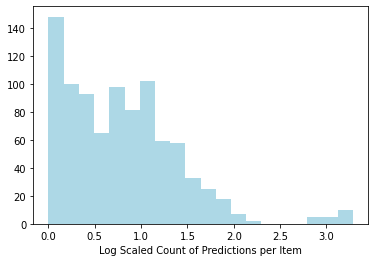

In [120]:
all_values = []
for list_ in user_predictions.values():
    for item in list_:
        all_values.append(item)
all_values = pd.Series(all_values)
plt.figure()
plt.hist(np.log10(all_values.value_counts()), bins=20, color='lightblue')
plt.xlabel('Log Scaled Count of Predictions per Item')
plt.show()

In [112]:
sum(all_values.value_counts()[:10])/(df.shape[1]*df.shape[0])

0.48944749934537835

In [111]:
df.shape

(10, 3819)